https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy

In [3]:
pip install pycountry

  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746867 sha256=5c791667f5c2fc489990021874812357a08efbba6b09c5892c11aedfdf7d6c74
  Stored in directory: c:\users\435484\appdata\local\pip\cache\wheels\57\e8\3f\120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry
Note: you may need to restart the kernel to use updated packages.


In [7]:
conda install -c conda-forge wordcloud=1.6.0 

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\435484\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - wordcloud=1.6.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       h5b45459_0         171 KB  conda-forge
    certifi-2021.5.30          |   py37h03978a9_0         142 KB  conda-forge
    conda-4.10.1               |   py37h03978a9_0         3.1 MB  conda-forge
    openssl-1.1.1k             |       h8ffe710_0         5.7 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    wordcloud-1.6.0            |   py37hfa6e2cd_0         186 KB  conda-forge
    ------------------------------------------------------------
                                       



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [9]:
pip install langdetect

  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993226 sha256=c357394ffef27d3b1e5fd05661a518ce488a32bbd3969f1b38a2030cff96e8d0
  Stored in directory: c:\users\435484\appdata\local\pip\cache\wheels\c5\96\8a\f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\435484\AppData\Roaming\nltk_data...


True

In [12]:
# Authentication
consumerKey = "YrT0xzNWJFUMMXIY3s2eY0Xpi"
consumerSecret = "AKKbyER77Ldx8T4oUuIasSHIgZOUzoIJcaUkoA9gjbJWzKswhH"
accessToken = "2364197815-xASVbQIMN2M2LPznODVr3RskTC7kiwY2tCogVcs"
accessTokenSecret = "P6uhqIql9CVDgQsJmywXNY6aVFWJlwg7dS14Mbvblr3DW"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [26]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
 
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Trump
Please enter how many tweets to analyze: 2500


TweepError: Twitter error response: status code = 429

In [27]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  129
positive number:  31
negative number:  65
neutral number:  33


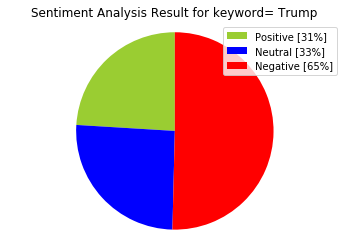

In [29]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [30]:
tweet_list

0
0    RT @SpiroAgnewGhost: All these leaks re: Manha...
1    RT @B52Malmet: For the life of me I don’t unde...
2    RT @davidfrum: Ex president Trump incited viol...
3    RT @PalmerReport: Bill Barr is now admitting t...
4    RT @OMFG_WhatNow: @bradmwarren What are the in...
..                                                 ...
124  RT @Nick_Carmody: Trump's speech was another i...
125  RT @NotDevinsMom: I’m on Team Trump Is Batshit...
126  @manulaffiest Fora que, ele renunciaria antes ...
127  RT @QuoteDigging: @thehill “If I had to wager ...
128  Facebook's Oversight Board says it will/will n...

[129 rows x 1 columns]

In [31]:
tweet_list.drop_duplicates(inplace = True)

In [36]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

0  \
0  RT @SpiroAgnewGhost: All these leaks re: Manha...   
1  RT @B52Malmet: For the life of me I don’t unde...   
2  RT @davidfrum: Ex president Trump incited viol...   
3  RT @PalmerReport: Bill Barr is now admitting t...   
4  RT @OMFG_WhatNow: @bradmwarren What are the in...   
5    @irebry @maximumPango @CNN Trump is better then   
6  RT @realstewpeters: One of the best parts of t...   
7  RT @page88: If it’s the Trump Org that goes do...   
8  RT @washingtonpost: Perspective: Donald Trump ...   
9  RT @RawStory: Bombshell Barr interview reveals...   

                                                text  
0   all these leaks re  manhattan da are coming f...  
1   for the life of me i don t understand why doj...  
2   ex president trump incited violence to try to...  
3   bill barr is now admitting that trump s 2020 ...  
4     what are the incredible things trump is all...  
5                               trump is better then  
6   one of the best parts of the evening    she s...  
7   if it s the trump org that goes down  is that...  
8   perspective  donald trump courted lgbtq votes...  
9   bombshell barr interview reveals trump had  c...

In [41]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
   
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

0  \
0  RT @SpiroAgnewGhost: All these leaks re: Manha...   
1  RT @B52Malmet: For the life of me I don’t unde...   
2  RT @davidfrum: Ex president Trump incited viol...   
3  RT @PalmerReport: Bill Barr is now admitting t...   
4  RT @OMFG_WhatNow: @bradmwarren What are the in...   
5    @irebry @maximumPango @CNN Trump is better then   
6  RT @realstewpeters: One of the best parts of t...   
7  RT @page88: If it’s the Trump Org that goes do...   
8  RT @washingtonpost: Perspective: Donald Trump ...   
9  RT @RawStory: Bombshell Barr interview reveals...   

                                                text  polarity  subjectivity  \
0   all these leaks re  manhattan da are coming f... -0.375000      0.625000   
1   for the life of me i don t understand why doj... -0.155556      0.288889   
2   ex president trump incited violence to try to...  0.000000      0.000000   
3   bill barr is now admitting that trump s 2020 ...  0.050000      0.500000   
4     what are the incredible things trump is all...  0.400000      0.500000   
5                               trump is better then  0.500000      0.500000   
6   one of the best parts of the evening    she s...  1.000000      0.300000   
7   if it s the trump org that goes down  is that... -0.155556      0.288889   
8   perspective  donald trump courted lgbtq votes...  0.000000      0.000000   
9   bombshell barr interview reveals trump had  c... -0.400000      0.550000   

  sentiment  neg  neu  pos  compound  
0  negative  NaN  NaN  NaN       NaN  
1   neutral  0.0  1.0  0.0       0.0  
2  negative  NaN  NaN  NaN       NaN  
3  negative  NaN  NaN  NaN       NaN  
4  positive  NaN  NaN  NaN       NaN  
5  positive  NaN  NaN  NaN       NaN  
6  positive  NaN  NaN  NaN       NaN  
7  negative  NaN  NaN  NaN       NaN  
8  positive  NaN  NaN  NaN       NaN  
9  negative  NaN  NaN  NaN       NaN

In [42]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [43]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

Total  Percentage
negative     58       49.15
positive     31       26.27
neutral      29       24.58

In [54]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

NameError: name 'pc' is not defined

In [55]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


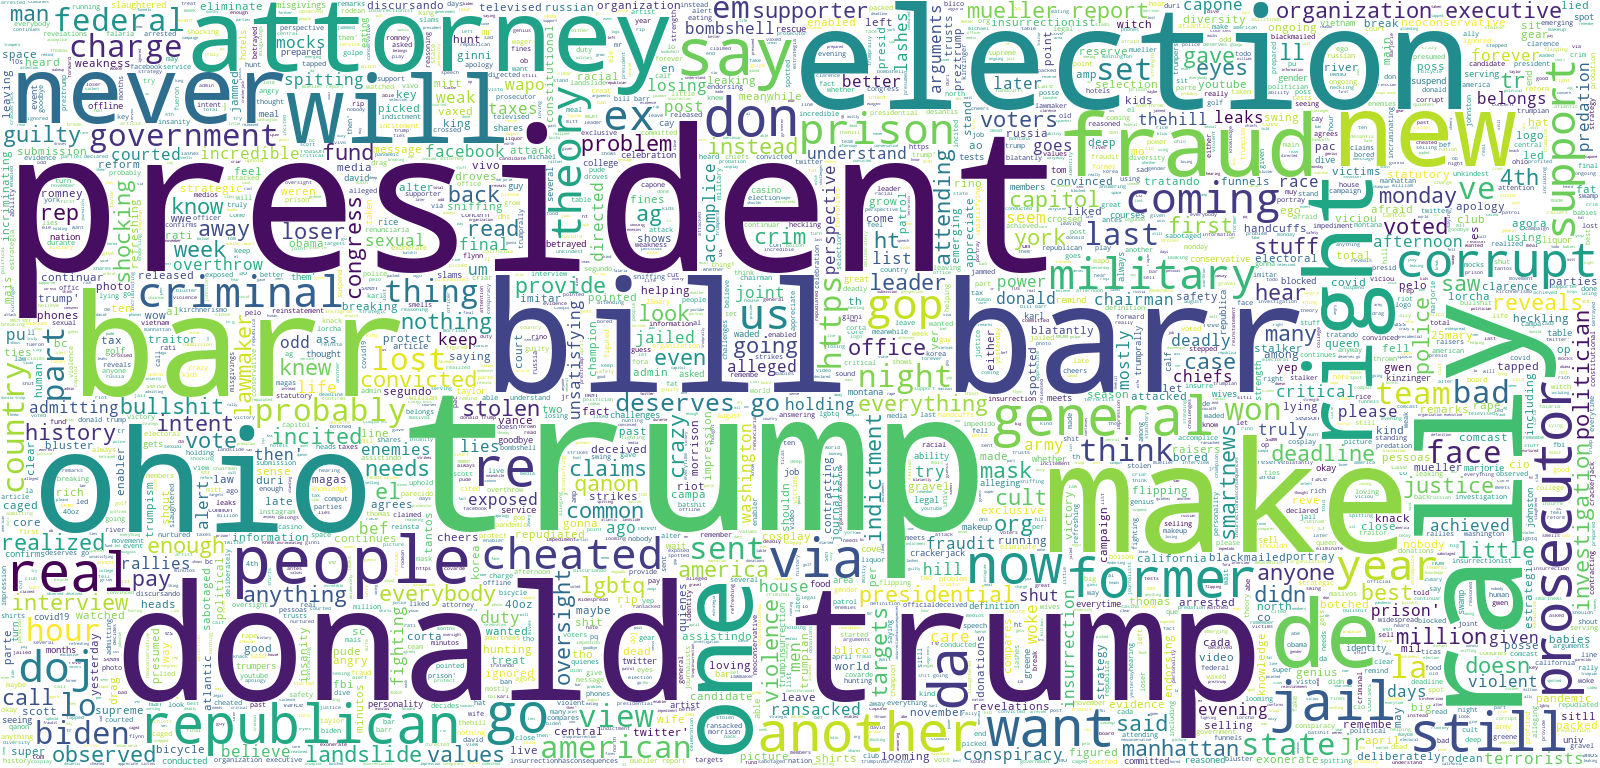

In [56]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


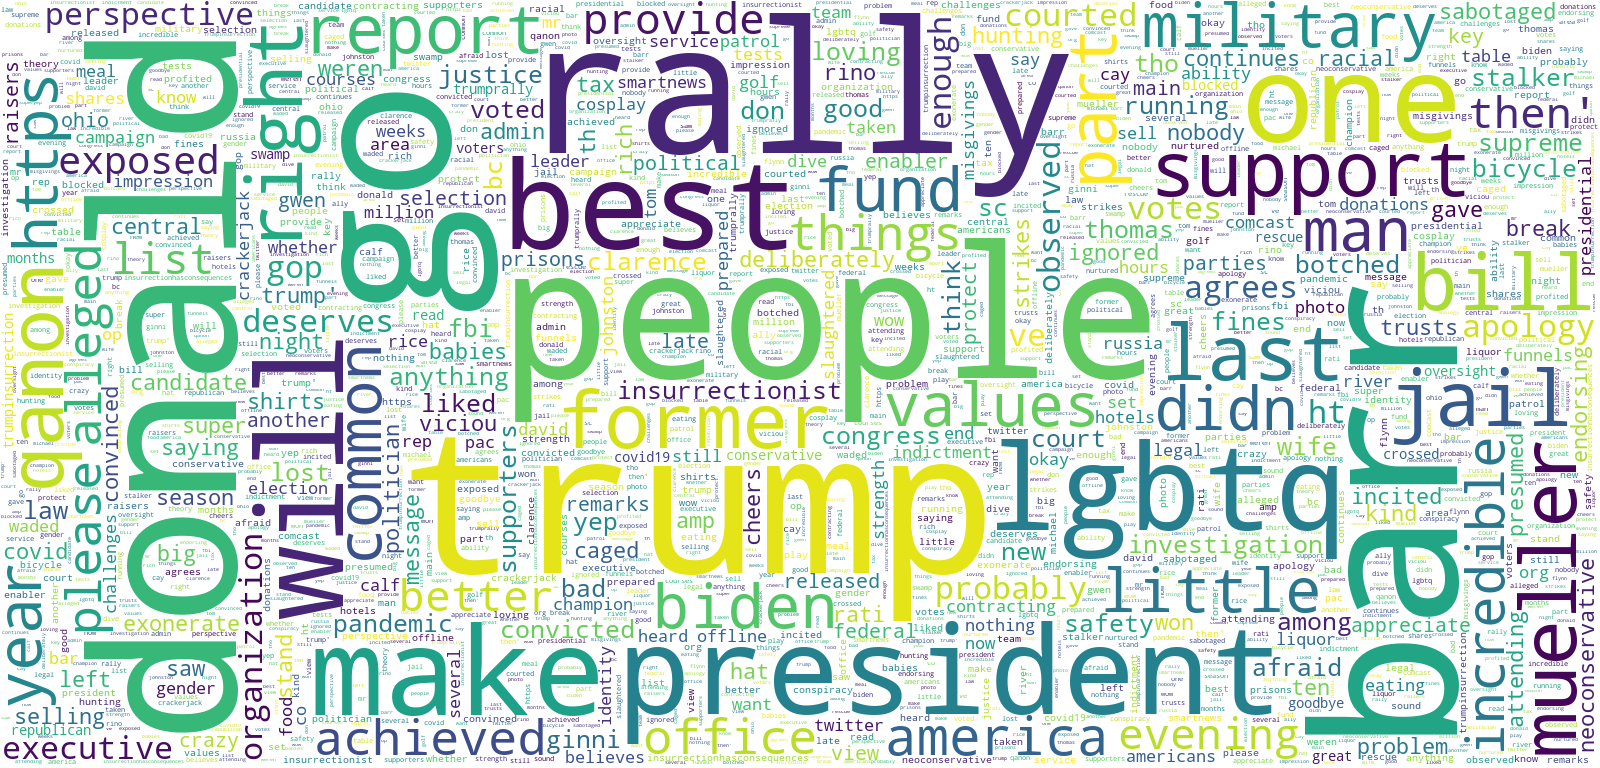

In [58]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


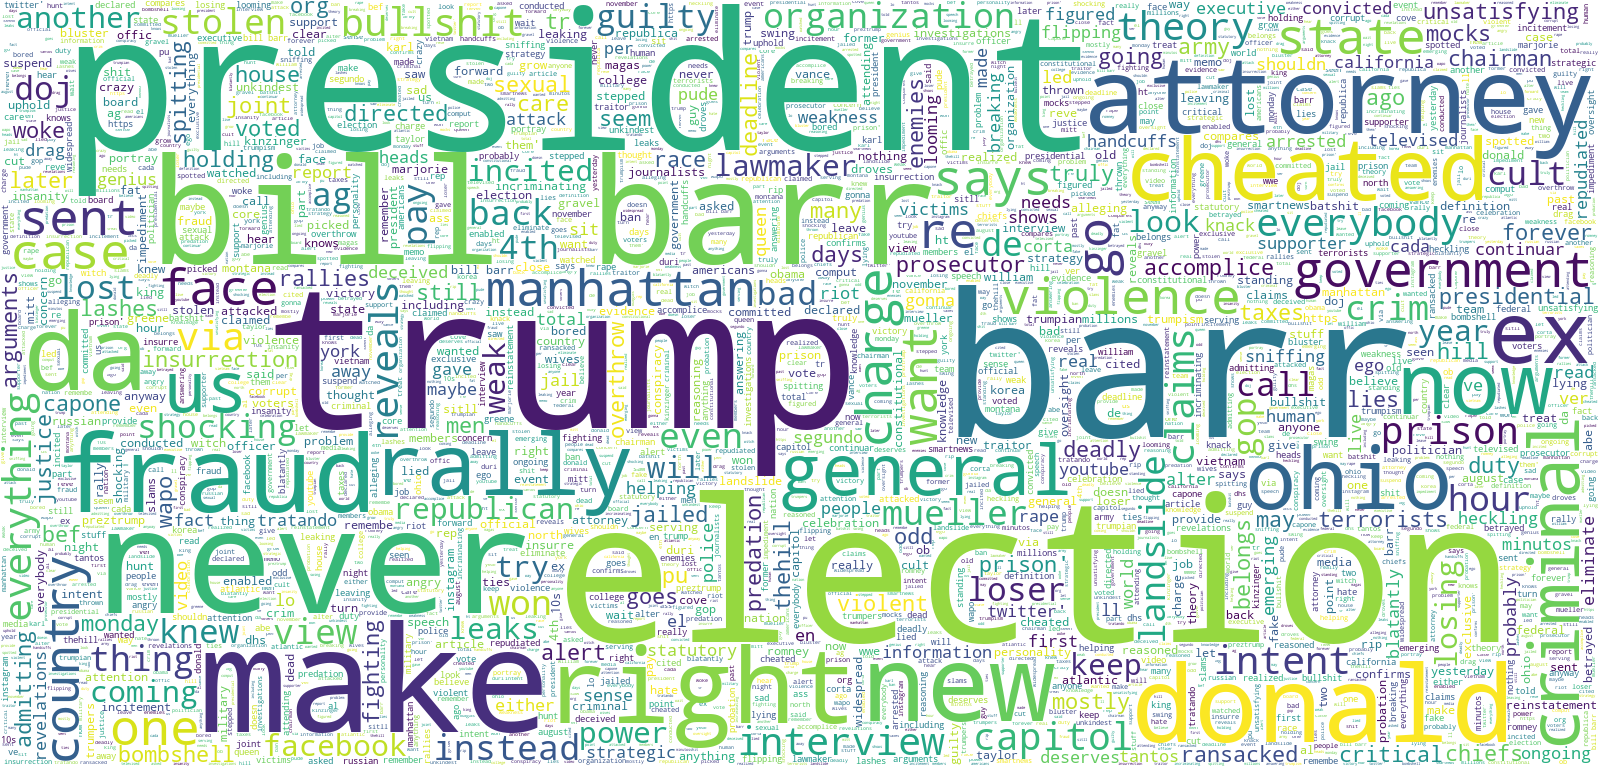

In [59]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

In [60]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

text_len
sentiment          
negative     104.76
neutral       82.83
positive     107.06

In [61]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

text_word_count
sentiment                 
negative             18.41
neutral              15.07
positive             18.23

In [63]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\435484\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [64]:
#Removing Punctuation

def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

#Appliyng tokenization

def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

#Removing stopwords

stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

0  \
0  RT @SpiroAgnewGhost: All these leaks re: Manha...   
1  RT @B52Malmet: For the life of me I don’t unde...   
2  RT @davidfrum: Ex president Trump incited viol...   
3  RT @PalmerReport: Bill Barr is now admitting t...   
4  RT @OMFG_WhatNow: @bradmwarren What are the in...   

                                                text  polarity  subjectivity  \
0   all these leaks re  manhattan da are coming f... -0.375000      0.625000   
1   for the life of me i don t understand why doj... -0.155556      0.288889   
2   ex president trump incited violence to try to...  0.000000      0.000000   
3   bill barr is now admitting that trump s 2020 ...  0.050000      0.500000   
4     what are the incredible things trump is all...  0.400000      0.500000   

  sentiment  neg  neu  pos  compound  text_len  text_word_count  \
0  negative  NaN  NaN  NaN       NaN       120               25   
1   neutral  0.0  1.0  0.0       0.0        81               17   
2  negative  NaN  NaN  NaN       NaN       126               22   
3  negative  NaN  NaN  NaN       NaN       123               21   
4  positive  NaN  NaN  NaN       NaN       107               18   

                                               punct  \
0   all these leaks re  manhattan da are coming f...   
1   for the life of me i don t understand why doj...   
2   ex president trump incited violence to try to...   
3   bill barr is now admitting that trump s 22 el...   
4     what are the incredible things trump is all...   

                                           tokenized  \
0  [, all, these, leaks, re, manhattan, da, are, ...   
1  [, for, the, life, of, me, i, don, t, understa...   
2  [, ex, president, trump, incited, violence, to...   
3  [, bill, barr, is, now, admitting, that, trump...   
4  [, what, are, the, incredible, things, trump, ...   

                                             nonstop  \
0  [, leaks, manhattan, da, coming, trump, attorn...   
1         [, life, understand, doj, shut, fraudit, ]   
2  [, ex, president, trump, incited, violence, tr...   
3  [, bill, barr, admitting, trump, 22, election,...   
4  [, incredible, things, trump, alleged, achieve...   

                                             stemmed  
0  [, leak, manhattan, da, come, trump, attorney,...  
1         [, life, understand, doj, shut, fraudit, ]  
2  [, ex, presid, trump, incit, violenc, tri, kee...  
3  [, bill, barr, admit, trump, 22, elect, claim,...  
4  [, incred, thing, trump, alleg, achiev, offic,...

In [68]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))

#print(countVectorizer.get_feature_names()) 1281 Number of reviews has 2966 words
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

118 Number of reviews has 695 words


abe  abil  abl  accomplic  achiev  admin  admit  afraid  afternoon  ...  \
0  2    0     0    0          0       0      0      0       0          0  ...   
1  2    0     0    0          0       0      0      0       0          0  ...   
2  2    0     0    0          0       0      0      0       0          0  ...   
3  2    0     0    0          0       0      0      1       0          0  ...   
4  2    0     0    0          0       1      0      0       0          0  ...   

   woke  world  would  wow  wwe  year  yep  yesterday  york  youtub  
0     0      0      0    0    0     0    0          0     0       0  
1     0      0      0    0    0     0    0          0     0       0  
2     0      0      0    0    0     0    0          0     0       0  
3     0      0      0    0    0     0    0          0     0       0  
4     0      0      0    0    0     0    0          0     0       0  

[5 rows x 695 columns]

In [69]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

0
trump   98
barr    19
presid  13
donald  12
ralli   10
bill    10
make     9
go       9
elect    9
ohio     8

In [70]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('donald trump', 11),
 ('trump rally', 6),
 ('trump attorneys', 4),
 ('president trump', 4),
 ('trump organization', 4),
 ('attorney general', 3),
 ('deserves jail', 3),
 ('organization executive', 3),
 ('mueller report', 3),
 ('rally ohio', 3),
 ('manhattan da', 2),
 ('da case', 2),
 ('2020 election', 2),
 ('claims bullshit', 2),
 ('trump org', 2),
 ('interview reveals', 2),
 ('trump criminal', 2),
 ('new york', 2),
 ('trump probably', 2),
 ('probably deserves', 2)]

In [71]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('trump organization executive', 3),
 ('trump rally ohio', 3),
 ('trump probably deserves', 2),
 ('probably deserves jail', 2),
 ('deserves jail ve', 2),
 ('jail ve observed', 2),
 ('trump rally night', 2),
 ('mueller report did', 2),
 ('prosecutors set targets', 2),
 ('set targets don', 2),
 ('targets don jr', 2),
 ('leaks manhattan da', 1),
 ('manhattan da coming', 1),
 ('da coming trump', 1),
 ('coming trump attorneys', 1),
 ('trump attorneys want', 1),
 ('attorneys want make', 1),
 ('want make da', 1),
 ('make da case', 1),
 ('da case look', 1)]